# Stroke prediction applying cross-validation, pipeline and SMOTE techniques.

## The output variable has a numerial representation where class 0 represents no stroke diagnosed and class 1 represents stroke diagnosed

## Dataset was sourced from kaggle.com

## By: Chidiebere Afamefuna


### Data loading 

In [1]:
#Importing of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading of dataset

stroke = pd.read_csv('C:\\Users\\USER\\Desktop\\classification\\healthcare-dataset-stroke-data.csv')

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.shape

(5110, 12)

In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Handling of NaN values

stroke['bmi'] = stroke.bmi.fillna(stroke["bmi"].mean())

### Exploratory data analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

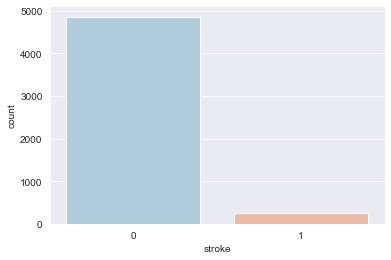

In [8]:
#Visualisation of stroke distribution
sns.set_style('darkgrid')
sns.countplot(x="stroke", data=stroke, palette='RdBu_r')

#### From the visual display, the output variable is an imbalanced one as people diagnosed with stroke are far lesser than those without

<AxesSubplot:xlabel='stroke', ylabel='count'>

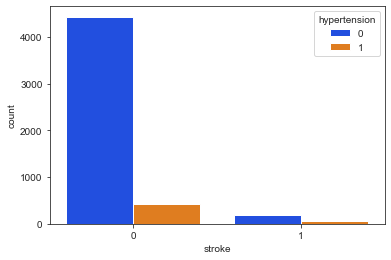

In [9]:
#Applying the stroke data to the Residence_type column

sns.set_style('ticks')
sns.countplot(x='stroke', hue ="hypertension", data=stroke, palette='bright')

<AxesSubplot:xlabel='stroke', ylabel='count'>

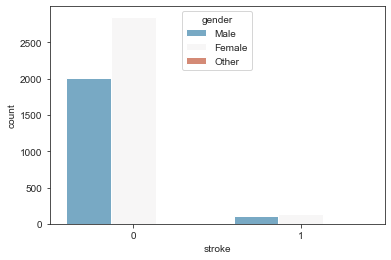

In [10]:
#Applying the stroke data to the gender column

sns.set_style('ticks')
sns.countplot(x='stroke', hue ="gender", data=stroke, palette='RdBu_r')

C:\Users\USER\Anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level'>

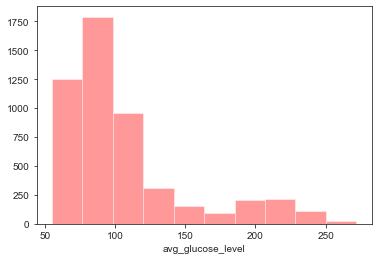

In [11]:
# Turbidity distribution avg_glucose_level

sns.distplot(stroke["avg_glucose_level"], kde=False, color = "r", bins = 10)

C:\Users\USER\Anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


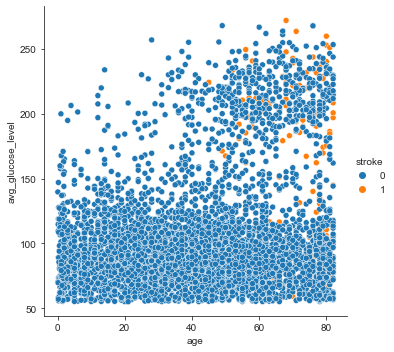

In [12]:
sns.relplot("age", "avg_glucose_level", hue = "stroke", data = stroke)

<AxesSubplot:xlabel='stroke', ylabel='count'>

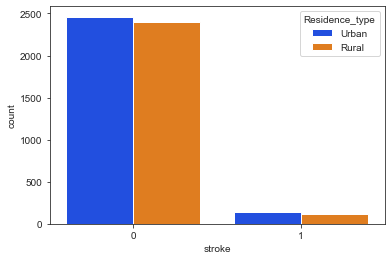

In [13]:
#Applying the stroke data to the Residence_type column

sns.set_style('ticks')
sns.countplot(x='stroke', hue ="Residence_type", data=stroke, palette='bright')

<AxesSubplot:xlabel='stroke', ylabel='count'>

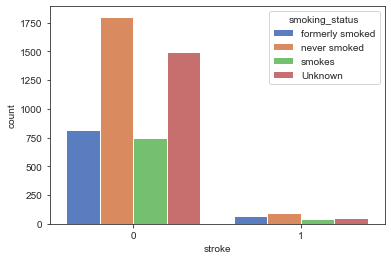

In [14]:
#Applying the stroke data to the smoking_status column

sns.set_style('ticks')
sns.countplot(x='stroke', hue ="smoking_status", data=stroke, palette='muted')

<AxesSubplot:xlabel='stroke', ylabel='age'>

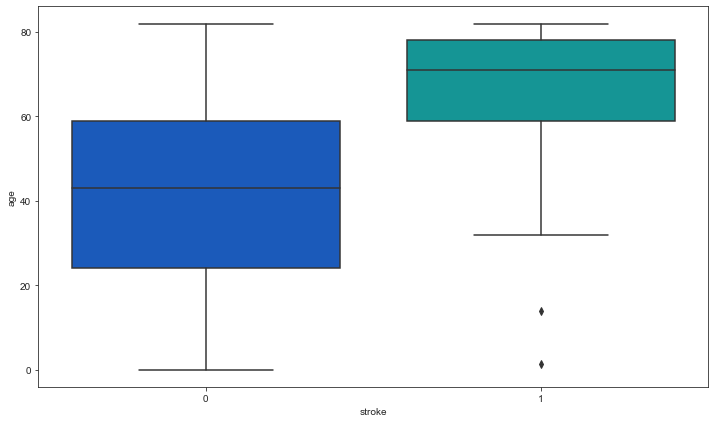

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x="stroke", y="age", data=stroke, palette="winter")

#### From the plot above, 
#### 25% of people with stroke are around 60years of age
#### 50% of people with stroke are around 72years of age
#### 75% of people with stroke are around 77years of age

Text(0.5, 1.0, 'Correlation heatpmap')

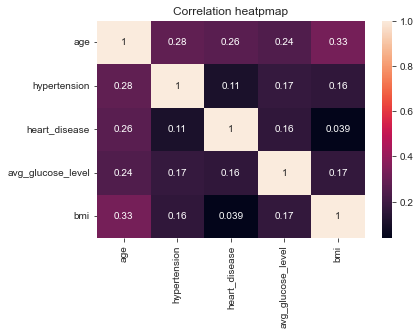

In [16]:
#correlation heatmap

corr = stroke.drop(["id", "stroke"], axis=1).corr()
sns.heatmap(corr, annot = True)
plt.title("Correlation heatpmap")

### Feature engineering

In [17]:
x = stroke.drop(["stroke", "id", "work_type", "Residence_type"], axis=1)
y = stroke.stroke

In [18]:
#Using column transformer

cat_col = x.select_dtypes(include="object").columns #categorical columns
num_col = x.select_dtypes(include=('int64', 'float64')).columns  #numerical columns


ohe = OneHotEncoder(handle_unknown = 'ignore')
sc = StandardScaler()

from sklearn.compose import make_column_transformer
ct = make_column_transformer((ohe,cat_col), (sc, num_col), remainder="passthrough")

In [19]:
cat_col

Index(['gender', 'ever_married', 'smoking_status'], dtype='object')

In [20]:
num_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [21]:
# Defining the Logistic Regression Model

logreg = LogisticRegression()

In [22]:
# Defining a pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct, logreg,)

In [23]:
pipe = make_pipeline(ct,logreg)


In [47]:
# Cross Validation 

scoring = ['precision_macro', 'recall_macro',"roc_auc","f1_macro"]
scores=cross_validate(pipe,x,y,cv=5,scoring=scoring)
sorted(scores.keys())

C:\Users\USER\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\envs\tensorfl

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro',
 'test_roc_auc']

In [25]:
print('F-1 score is {0:8.2f}%'.format(scores['test_f1_macro'].mean()))
print('Precision score is {0:8.2f}%'.format(scores['test_precision_macro'].mean()))
print('Recall score is {0:8.2f}%'.format(scores['test_recall_macro'].mean()))
print('ROC_AUC score is {0:8.2f}%'.format(scores['test_roc_auc'].mean()))

F-1 score is     0.49%
Precision score is     0.48%
Recall score is     0.50%
ROC_AUC score is     0.84%


In [28]:
# Cross Validation for model accuracy
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, x, y, cv=5, scoring="accuracy").mean()

0.9512720156555773

### Applying "Synthetic Minority Oversampling Technique (SMOTE)" in handling of imbalanced dataset

In [29]:
# defining new dataframe for independent variables

xx = pd.DataFrame(x)

In [30]:
xx

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,166.29,25.600000,formerly smoked


In [31]:
xx.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

In [32]:
# Handling of categorical features

xx = pd.get_dummies(xx, columns=["gender", "ever_married", "smoking_status"])
xx.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,0,1,0


In [33]:
xx.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

In [34]:
yy = y

In [35]:
# Defining the SMOTE method

oversample  = SMOTE()

In [36]:
# Using SMOTE to oversample the minority class

over_xx, over_yy = oversample.fit_resample(xx, yy)

In [37]:
# Splitting of dataset

over_xx_train, over_xx_test, over_yy_train, over_yy_test =train_test_split(over_xx, over_yy, test_size=0.3, random_state=1)

In [38]:
# Random Forest model definition

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

In [39]:
# Fitting of model to data

rf.fit(over_xx_train, over_yy_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [40]:
# Model prediction

pred_rf = rf.predict(over_xx_test)

In [41]:
# Model eveluation

score = confusion_matrix(pred_rf, over_yy_test)
print(score)

[[1417   57]
 [  36 1407]]


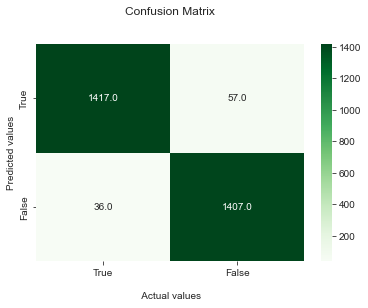

In [42]:
# Plotting of confusion matrix

ax = sns.heatmap(score, annot=True, fmt='.1f', cmap = "Greens")
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\n Actual values')
ax.set_ylabel('Predicted values')
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True', 'False'])
plt.show()

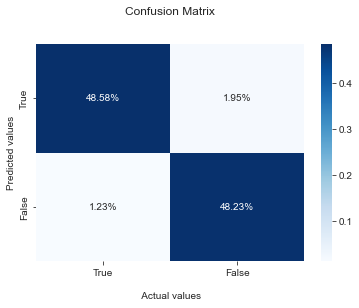

In [43]:
# Plotting of confusion matrix

ax = sns.heatmap(score/np.sum(score), annot=True, fmt='.2%', cmap = "Blues")
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\n Actual values')
ax.set_ylabel('Predicted values')
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True', 'False'])
plt.show()


In [44]:
# Classification report

report = classification_report(pred_rf, over_yy_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1474
           1       0.96      0.98      0.97      1443

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



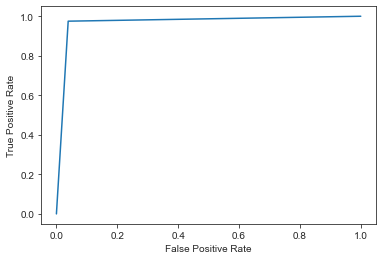

In [45]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(pred_rf, over_yy_test)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

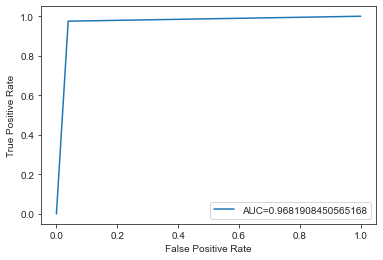

In [46]:
auc = metrics.roc_auc_score(pred_rf, over_yy_test)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()